In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from erank.data import get_metadataset_class
from omegaconf import OmegaConf

from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sinus_dataset_class = get_metadataset_class('sinus')
sinus_dataset_class

erank.data.sinusdataset.SinusDataset

In [3]:
sinus_cfg = """
support_size: 10
query_size: 50
num_tasks: 10000
amplitude_range: [0.1, 5.0]
phase_range: [0, 6.283185307]
x_range: [-5, 5]
regenerate_task_support_set: False
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_cfg

{'support_size': 10, 'query_size': 50, 'num_tasks': 10000, 'amplitude_range': [0.1, 5.0], 'phase_range': [0, 6.283185307], 'x_range': [-5, 5], 'regenerate_task_support_set': False}

In [4]:
sinus_dataset = sinus_dataset_class(**sinus_cfg)

In [5]:
tasks = sinus_dataset.sample_tasks(5)

In [6]:
def plot_tasks(tasks):
    for t in tasks:
        plt.plot(t.query_set[0].numpy(), t.query_set[1].numpy())

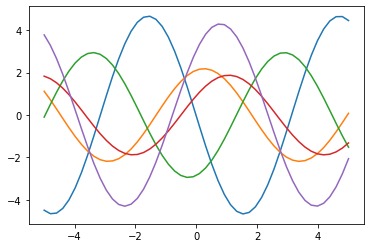

In [7]:
# plot task batch
plot_tasks(tasks)

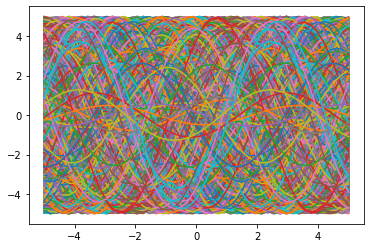

In [8]:
# plot all tasks
plot_tasks(sinus_dataset.tasks)

In [9]:
task = tasks[4]

In [10]:
task.support_set

(tensor([-2.2300, -3.9216,  3.2751,  0.5158, -2.9911,  2.4169, -2.5693, -1.5315,
          4.2650, -2.6043]),
 tensor([-4.2612, -0.0188, -3.4114,  4.1385, -3.4553, -0.2562, -4.1968, -2.9183,
         -4.0532, -4.1622]))

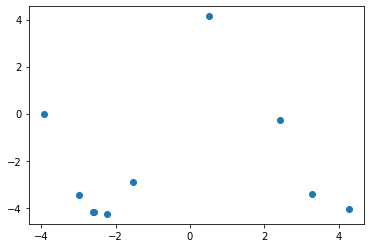

In [11]:
plt.plot(task.support_set[0].numpy(), task.support_set[1].numpy(), 'o')

In [12]:
task.query_set

(tensor([-5.0000, -4.7959, -4.5918, -4.3878, -4.1837, -3.9796, -3.7755, -3.5714,
         -3.3673, -3.1633, -2.9592, -2.7551, -2.5510, -2.3469, -2.1429, -1.9388,
         -1.7347, -1.5306, -1.3265, -1.1224, -0.9184, -0.7143, -0.5102, -0.3061,
         -0.1020,  0.1020,  0.3061,  0.5102,  0.7143,  0.9184,  1.1224,  1.3265,
          1.5306,  1.7347,  1.9388,  2.1429,  2.3469,  2.5510,  2.7551,  2.9592,
          3.1633,  3.3673,  3.5714,  3.7755,  3.9796,  4.1837,  4.3878,  4.5918,
          4.7959,  5.0000]),
 tensor([ 3.7756,  3.2825,  2.6530,  1.9135,  1.0945,  0.2301, -0.6438, -1.4910,
         -2.2764, -2.9672, -3.5349, -3.9559, -4.2127, -4.2947, -4.1983, -3.9278,
         -3.4942, -2.9156, -2.2160, -1.4244, -0.5737,  0.3008,  1.1629,  1.9767,
          2.7084,  3.3277,  3.8089,  4.1320,  4.2836,  4.2575,  4.0546,  3.6834,
          3.1594,  2.5042,  1.7451,  0.9135,  0.0441, -0.8272, -1.6642, -2.4320,
         -3.0990, -3.6373, -4.0247, -4.2450, -4.2891, -4.1552, -3.8488, -3.3827,

([<matplotlib.lines.Line2D at 0x7f9e0642e610>], 2.1830148025167335)

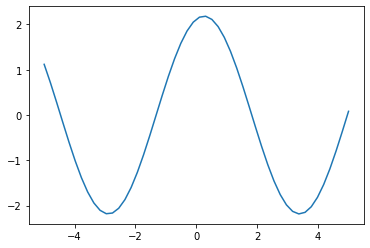

In [13]:
task = tasks[1]
plt.plot(task.query_set[0].numpy(), task.query_set[1].numpy()), task.amplitude

In [14]:
sinus_dataset.amplitudes

array([0.56159753, 1.86480066, 3.49571629, ..., 0.89479186, 1.27545265,
       4.73605048])

In [15]:
for t in tasks:
    print(t.amplitude)

4.659564655479703
2.1830148025167335
2.9411907192785853
1.8756953531264609
4.294796392739771
